
# PATH Model Tutorial

This notebook demonstrates the complete workflow for using the PATH model (TransPath) for spatial transcriptomics analysis.

## Overview

The PATH (TransPath) model is designed to analyze spatial transcriptomics data by extracting meaningful embeddings from tissue images and predicting pathway activities. This tutorial walks through:

1. **Environment Setup**: Installing required libraries and cloning the PATH repository
2. **Data & Model Retrieval**: Downloading pre-trained model weights and example datasets
3. **Data Processing**: Loading and preprocessing spatial transcriptomics data (.h5ad format)
4. **Model Inference**: Initializing the model, loading weights, and extracting embeddings
5. **Downstream Analysis**: Clustering, pathway prediction, and visualization

## Prerequisites

- Python environment with CUDA support (recommended for GPU acceleration)
- Sufficient disk space for model weights and datasets (~several GB)

## Step 1: Install Dependencies

Install the required Python packages:
- `scanpy`: For handling spatial transcriptomics data
- `gdown`: For downloading files from Google Drive


In [ ]:
!pip install scanpy gdown
!git clone https://github.com/madilabcode/PATH

## Step 2: Clone TransPath Repository

Change to the PATH directory and run the setup script to clone the TransPath repository. This script will set up the necessary dependencies and directory structure.

In [2]:
import os
os.chdir("PATH")
!chmod 777  ./clone_transpath.sh
!./clone_transpath.sh

Cloning TransPath into ./TransPath...
Cloning into 'TransPath'...
remote: Enumerating objects: 206, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 206 (delta 53), reused 35 (delta 35), pack-reused 148 (from 1)
Receiving objects: 100% (206/206), 82.17 KiB | 1.35 MiB/s, done.
Resolving deltas: 100% (99/99), done.
Successfully cloned TransPath into ./TransPath


1. Downloading CTransPath model (recommended)...
Downloading...
From (original): https://drive.google.com/uc?id=1DoDx_70_TLj98gTf6YTXnu4tFhsFocDX
From (redirected): https://drive.google.com/uc?id=1DoDx_70_TLj98gTf6YTXnu4tFhsFocDX&confirm=t&uuid=bdfcbe95-2587-4773-9fa0-96a73c8ed05f
To: /content/PATH/TransPath/ctranspath.pth
100% 111M/111M [00:00<00:00, 130MB/s]
Successfully downloaded ctranspath.pth

2. Downloading MoCo v3 model...
Downloading...
From (original): https://drive.google.com/uc?id=13d_SHy9t9JCwp_MsU2oOUZ5AvI6tsC-K
From (redirected): https://drive.googl

## Step 3: Download Data and Model Weights

Download the required files from Google Drive:
- **hd_obj.h5ad**: Example spatial transcriptomics dataset (AnnData format)
- **hd_wights.pth**: Pre-trained model weights for the PATH model
- **mask_hd.pkl**: Pathway mask file defining which pathways to analyze
- **timm.tar**: Timm library archive (vision transformer dependencies)

In [3]:
import gdown
file_id_obj = "1vICnccokrUrOTcNbNd-FXortyf0QNNGM"
output_path_obj = './data/hd_obj.h5ad'
file_id_wights = "1KXvTXc6XnPASSY652lOaF9ZQCvd0cCkk"
output_file_wights = './models/hd_wights.pth'
file_id_mask = "1uAIxdMRwCseJI4Dkr9tXRwcvGYJzn0x5"
output_file_mask = './data/mask_hd.pkl'
file_id_timm ="1L7dbztMHC-ipFrlILLcX8GXGne3mr6fZ"
out_put_timm = "./timm.tar"
gdown.download(id=file_id_obj, output=output_path_obj, quiet=False)
gdown.download(id=file_id_wights, output=output_file_wights, quiet=False)
gdown.download(id=file_id_mask, output=output_file_mask, quiet=False)
gdown.download(id=file_id_timm, output=out_put_timm, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1vICnccokrUrOTcNbNd-FXortyf0QNNGM
From (redirected): https://drive.google.com/uc?id=1vICnccokrUrOTcNbNd-FXortyf0QNNGM&confirm=t&uuid=17ef7f40-6e9d-42e9-9917-bee7b1dc79c1
To: /content/PATH/data/hd_obj.h5ad
100%|██████████| 1.66G/1.66G [00:14<00:00, 118MB/s] 
Downloading...
From (original): https://drive.google.com/uc?id=1KXvTXc6XnPASSY652lOaF9ZQCvd0cCkk
From (redirected): https://drive.google.com/uc?id=1KXvTXc6XnPASSY652lOaF9ZQCvd0cCkk&confirm=t&uuid=4006783e-1785-4f0b-a94a-00835c76a73e
To: /content/PATH/models/hd_wights.pth
100%|██████████| 117M/117M [00:01<00:00, 63.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1uAIxdMRwCseJI4Dkr9tXRwcvGYJzn0x5
To: /content/PATH/data/mask_hd.pkl
100%|██████████| 10.7k/10.7k [00:00<00:00, 18.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1L7dbztMHC-ipFrlILLcX8GXGne3mr6fZ
To: /content/PATH/timm.tar
100%|██████████| 1.96M/1.96M [00:00<00:00, 14.1MB/s]


'./timm.tar'

## Step 4: Install Timm Library

Install the timm (PyTorch Image Models) library from the downloaded archive. This library provides the vision transformer backbone used by the PATH model.
session may need to rest - its ok


In [4]:
!pip install timm.tar igraph leidenalg

Processing ./timm.tar
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 107.7 MB/s eta 0:00:00
  Created wheel for timm: filename=timm-0.5.4-py3-none-any.whl size=431520 sha256=31d87c0501aaf59a163a87a8be69ac60bbe63a51e942e2844804d6d388434ffd
  Stored in directory: /tmp/pip-ephem-wheel-cache-h7p3e11y/wheels/b5/8b/9b/6632040abbe038181db18350acabc0846193f0a2ae8e6e5eb2
Successfully built timm
  Attempting uninstall: timm
    Found existing installation: timm 1.0.24
    Uninstalling timm-1.0.24:
      Successfully uninstalled timm-1.0.24


## Step 5: Load Spatial Data

Load the spatial transcriptomics data using scanpy

In [5]:
import scanpy as sc
import os
#os.chdir("PATH")
obj = sc.read_h5ad('./data/hd_obj.h5ad')


/usr/local/lib/python3.12/dist-packages/anndata/_core/anndata.py:1806: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


## Step 6: Process Coordinates and Load Mask

Process the spatial coordinates from the AnnData object to extract image patches corresponding to each spot. Load the pathway mask that defines which KEGG pathways are included in the analysis.


In [6]:
import scripts.Utils as ut
import torch
import pandas as pd
import pickle

imgs = ut.process_coord_obj_hd(obj)
with open('./data/mask_hd.pkl', 'rb') as f:
    mask = pickle.load(f)

## Step 7: Initialize PATH Model

Create the PATH model with the following parameters:
- `kegg_dim`: Number of pathways (determined by mask)
- `lora_rank`: LoRA rank for efficient fine-tuning (8)
- `num_slides`, `num_samples`, `num_datasets`: Dataset configuration parameters
- `classification_mode`: Set to True for pathway prediction

Load the pre-trained weights from the downloaded checkpoint.


In [7]:
import src.PATH as path
model = path.create_model(kegg_dim=mask.sum(),lora_rank=8,num_slides=1, num_samples=1, num_datasets=1,classification_mode=True)
model.load_model(r"./models/hd_wights.pth")

/usr/local/lib/python3.12/dist-packages/torch/functional.py:505: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4317.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Applying LoRA to attention and MLP layers...

Total LoRA layers applied: 48

Parameter Statistics:
  Total parameters: 29,043,438
  Trainable parameters: 3,125,166
  Trainable ratio: 0.1076 (10.76%)
Model loaded from ./models/hd_wights.pth


## Step 8: Create DataLoader

Define a simple PyTorch Dataset class to handle the image data and create a DataLoader for batch processing. The batch size is set to 128 for efficient GPU utilization.

In [8]:
from torch.utils.data import DataLoader, Dataset


class basic_dataset(Dataset):
    def __init__(self, images):
        self.images = images

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        return self.images[idx]

dataloader = DataLoader(basic_dataset(imgs), batch_size=128, shuffle=False, drop_last=False)



## Step 9: Extract Embeddings

Extract embeddings from the PATH model for all spots in the dataset. These embeddings capture spatial and molecular features learned by the model.


In [9]:
encoded = ut.get_embeddings(model, dataloader)


100%|██████████| 235/235 [02:04<00:00,  1.89it/s]


## Step 10: Clustering Analysis

Perform downstream analysis using the extracted embeddings:

1. Add embeddings to the AnnData object
2. Compute k-nearest neighbors graph using the embeddings
3. Perform Leiden clustering to identify spatial domains
4. Visualize clusters on the spatial coordinates



/tmp/ipython-input-3663415406.py:3: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(obj, resolution=0.15, key_added="embedding_leiden")


Leiden clusters found: 6


/tmp/ipython-input-3663415406.py:10: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(obj, color="embedding_leiden", spot_size=100, show=False)


[<Axes: title={'center': 'embedding_leiden'}, xlabel='spatial1', ylabel='spatial2'>]

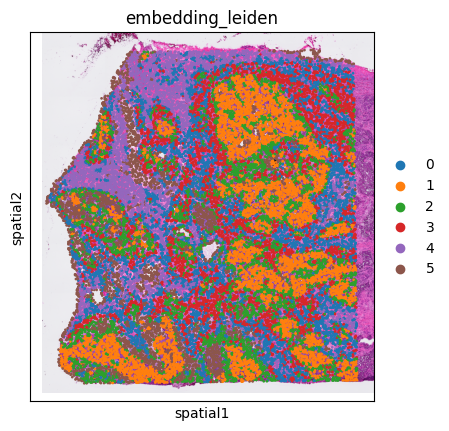

In [10]:

obj.obsm["X_embed"] = encoded
sc.pp.neighbors(obj, use_rep="X_embed", n_neighbors=15)
sc.tl.leiden(obj, resolution=0.15, key_added="embedding_leiden")

# See real number of clusters found
num_leiden_clusters = len(obj.obs["embedding_leiden"].unique())
print(f"Leiden clusters found: {num_leiden_clusters}")

# Plot clusters on spatial locations
sc.pl.spatial(obj, color="embedding_leiden", spot_size=100, show=False)


## Step 12: Predict Pathway Activities

Use the model's KEGG head to predict pathway activities from the extracted embeddings. This generates pathway activity scores for each spot, which can be used for downstream biological interpretation.

**Note**: Ensure you have CUDA available for GPU acceleration, otherwise the model will run on CPU (slower).


In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
predication_pd = model.kegg_head(torch.tensor(encoded).to(device))
predication_pd = predication_pd.detach().cpu().numpy()
predication_pd = pd.DataFrame(predication_pd, columns=mask[mask==True].index)


/tmp/ipython-input-1858037647.py:2: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(obj, color="DNA replication", spot_size=200, show=True)


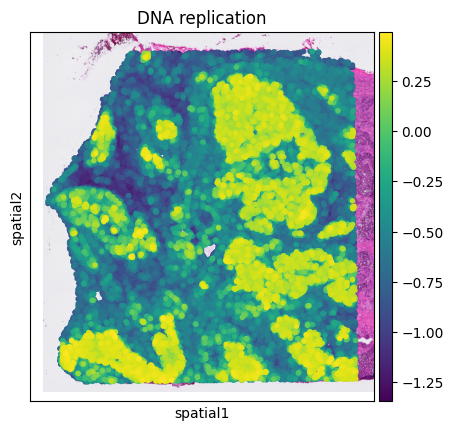

In [12]:
obj.obs["DNA replication"] = predication_pd["DNA replication"].values
sc.pl.spatial(obj, color="DNA replication", spot_size=200, show=True)

## Step 13: Pathway Activity Analysis

Perform differential pathway activity analysis between clusters:

1. **Statistical Testing**: Use Mann-Whitney U test to identify pathways enriched in each cluster compared to the rest
2. **Multiple Testing Correction**: Apply Benjamini-Hochberg FDR correction
3. **Visualization**: Create a clustered heatmap showing pathway activities across clusters

The analysis identifies pathways that are significantly enriched in each spatial domain, providing biological insights into regional tissue function.


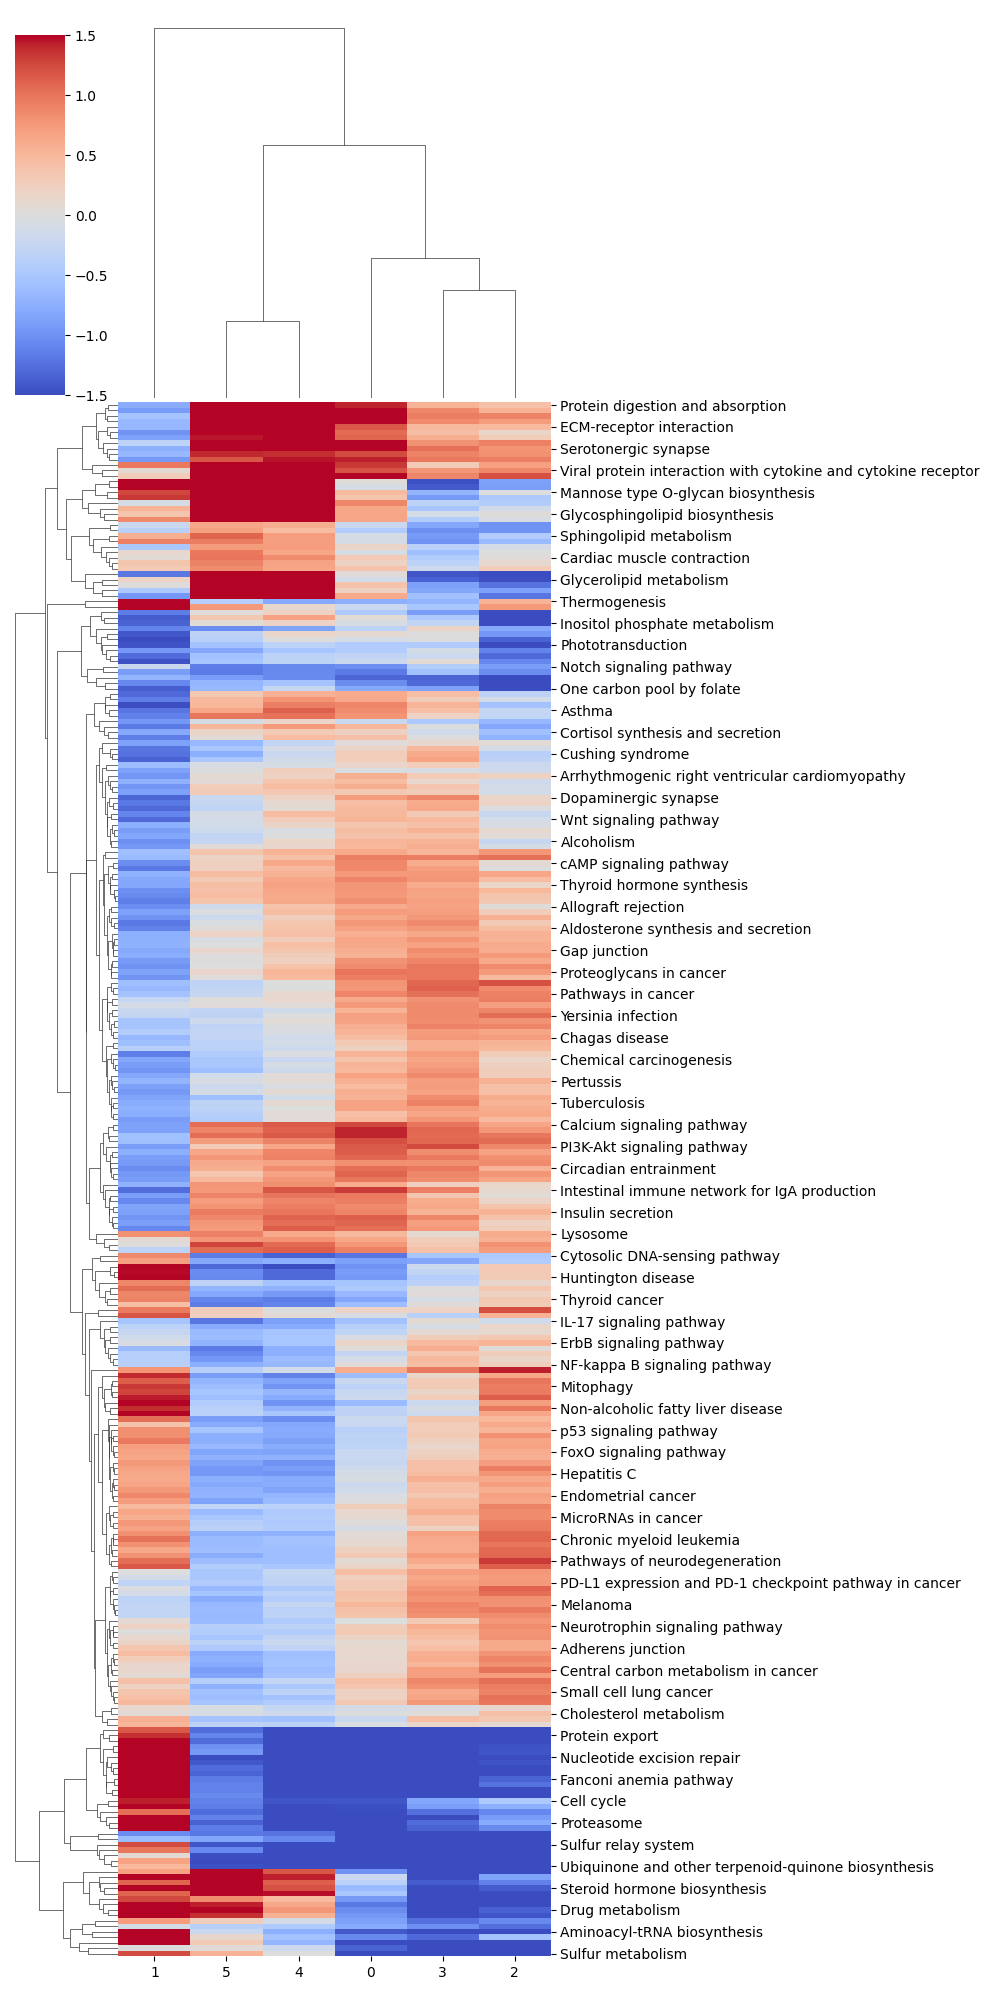

In [13]:
import scripts.anaylsis as an
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

cluster_labels = obj.obs["embedding_leiden"].values
pathway_names = np.asarray(predication_pd.columns)  # keep your existing naming

results_per_cluster, selected_pathways = an.cluster_vs_rest_pathways(
    predictions=predication_pd,
    cluster_labels=cluster_labels,
    pathway_names=pathway_names,
    fdr_thresh=0.05,
    min_mean_diff=0.0,
    alternative="greater",
    top_k_fallback=15,
)

# Build your cluster x pathway heatmap matrix using selected_pathways
avg_pathways_df = pd.DataFrame(
    [predication_pd[cluster_labels == c].mean(axis=0) for c in pd.unique(cluster_labels)],
    index=[str(c) for c in pd.unique(cluster_labels)],
    columns=pathway_names
)

heatmap_df = avg_pathways_df[selected_pathways]
heatmap_df_z = heatmap_df.sub(heatmap_df.mean(axis=1), axis=0).div(heatmap_df.std(axis=1).replace(0, 1), axis=0)
ax = sns.clustermap(heatmap_df_z.T, cmap="coolwarm", figsize=(10, 20), vmin=-1.5, vmax=1.5)

## Step 14: PCA analysis

We apply PCA to the model predictions in order to organize pathways into major orthogonal components and to visualize the spatial regions of the slide associated with each principal component (PC).


/content/PATH/scripts/anaylsis.py:171: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(


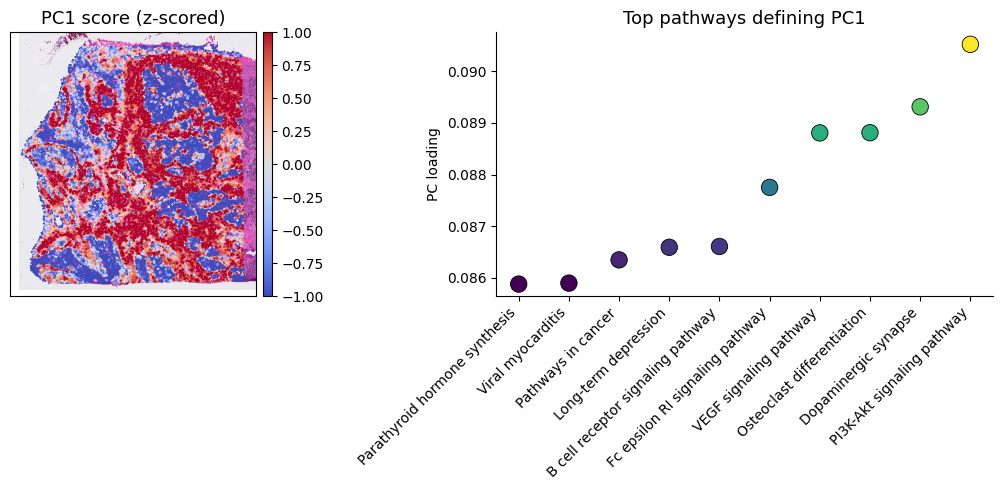

/content/PATH/scripts/anaylsis.py:171: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(


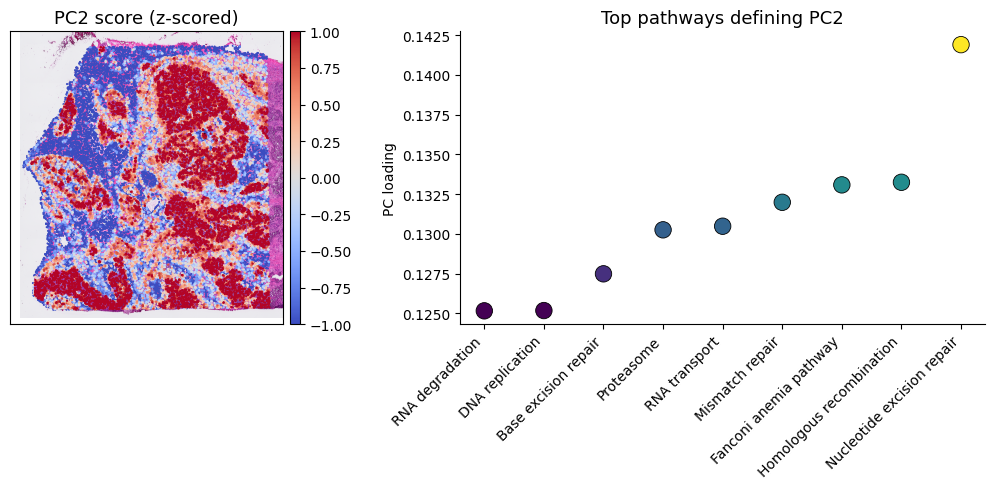

/content/PATH/scripts/anaylsis.py:171: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(


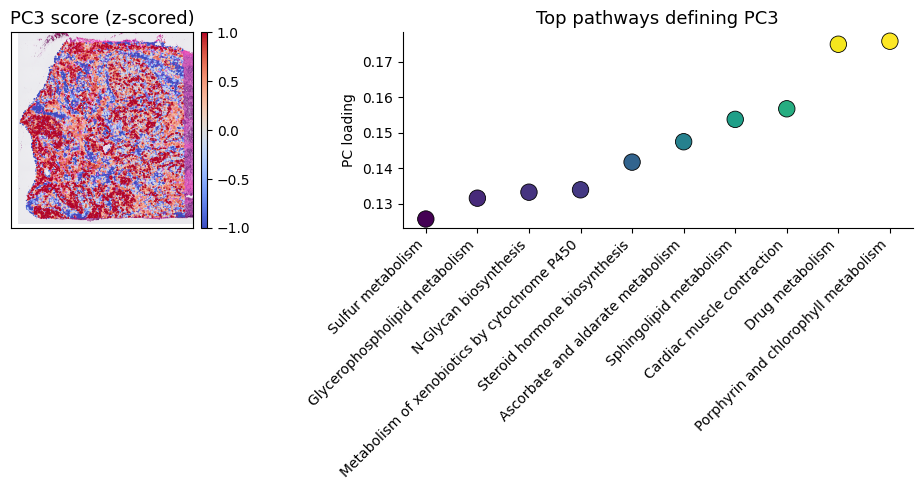

In [14]:
an.pca_anaylsis(predication_pd,obj,3)